# Classifying Parking Tickets in Washington, DC - 2018

## Overview

__What?__

This study intends to leverage parking violation data from 2018 to build a classifier model to identify the likelihood of a parking ticket at a given location, date and time in Washington, DC.

__When?__

- Identify the features that predict the likelihood of a parking violation
- Determine if geographic factors have any impact on parking violations
- Determine if day and/or time have any impact on parking violations
- Create a model that scores 85% or better
- Incorporate unit tests and linting through GitHub Actions in an effort to mimic a professional setting

__Why?__

After almost 10 years of not owning a car, in 2015 I purchased a new car for my family.  Within a month I received a parking ticket.  The pace continued, and I received on average 2 tickets a year.  I even received tickets at parking meters that I had paid for!

Parking tickets are an expensive nuisance, an unexpected expense often totaling $100.  What if one could understand the likelihood of a parking ticket at a given place and time?

__Who?__

The project is interesting for citizen data scientists and anyone who is curious about understanding how their government operates.

__Background and Research__

Parking violations, along with other civic matters, have been the subject of prior research.

- "[How to Do a Data Science Project That Is Actually Useful - Like avoiding parking tickets in Vancouver!](https://medium.com/analytics-vidhya/how-to-do-a-data-science-project-that-is-actually-useful-ba28a4360a4)", Parampaul Nahal
- "[Predicting the spatiotemporal legality of on-street parking using open data and machine learning](https://www.tandfonline.com/doi/full/10.1080/19475683.2019.1679882)" - Song Gao, Mingxiao Li, Yunlei Liang, Joseph Marks,Yuhao Kang, Moying Li



## Get the Data

__Who?__

The data sets are provided by the DC government through their [open data portal](https://opendata.dc.gov/).

__When?__

The dataset is retrieved via a search of a RESTful API.  The data retrieval is made through requests using the `requests` library.  The download is managed in `/scripts/main.py`, which makes a POST search request to retrieve all available datasets.  The script pages through the results and downloads all the files from 2018 into a staging folder.  From there, data is cleaned via `/scripts/cleaning.py` and stored into a cleaned directory.  Lastly, data from the cleaned directory and merged into a single CSV.

__What?__

The data set represents all the parking violations issued in Washington, DC but local and federal authorities.  The data is spread across monthly reports.  

__Links__

- Sample dataset - [Parking Violations Issued in August 2018](https://opendata.dc.gov/datasets/parking-violations-issued-in-august-2018)

- Data dictionary

| Column Name | Type |
|---|---|
| DISPOSITION_CODE | Number |
| DISPOSITION_DATE | Date or Time |
| DISPOSITION_DESC | Text |
| DISPOSITION_TYPE | Text |
| FINE_AMOUNT | Number |
| GIS_LAST_MOD_DTTM | Date or Time |
| ISSUE_DATE | Date or Time |
| ISSUE_TIME | Text |
| ISSUING_AGENCY_CODE | Number |
| ISSUING_AGENCY_NAME | Text |
| ISSUING_AGENCY_SHORT | Text |
| LATITUDE | Number |
| LOCATION | Text |
| LONGITUDE | Number |
| MAR_ID | Number |
| MULTI_OWNER_NUMBER | Text |
| OBJECTID | Unique ID |
| PENALTY_1 | Number |
| PENALTY_2 | Number |
| PENALTY_3 | Number |
| PENALTY_4 | Number |
| PENALTY_5 | Number |
| PLATE_STATE | Text |
| TOTAL_PAID | Number |
| VEHICLE_TYPE | Text |
| VIOLATION_CODE | Text |
| VIOLATION_PROC_DESC | Text |
| XCOORD | Number |
| YCOORD | Number |

This is supervised learning problem, targeting a custom column, `DISPOSITION_RESULT`, which is a binary value indicating whether a ticket was issued.  The columns for the assessment are:

| Column Name | Type | Custom |
|---|---|
| LATITUDE | Number | No |
| LONGITUDE | Number | No |
| ISSUE_DATE | Date | Yes |
| ISSUE_TIME | Time | Yes |

In [1]:
# load pandas for data analysis
import pandas as pd

# load dataset
parking_violations = pd.read_csv('../data/sample/Parking_Violations_Issued_in_August_2018.csv')

## Explore the Data

In [2]:
# head of dataset
parking_violations.head()

,OBJECTID,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROC_DESC,LOCATION,PLATE_STATE,...,PENALTY_2,PENALTY_3,PENALTY_4,PENALTY_5,XCOORD,YCOORD,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
0,290490,2018/08/24 04:00:00+00,01:44 AM,7.0,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4205 4TH ST SE,,...,NaN,1.0,NaN,NaN,399920.0,129047.0,38.829,-77.001,147401.0,2019/05/29 04:16:08+00
1,290491,2018/08/24 04:00:00+00,01:46 PM,7.0,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4205 4TH ST SE,,...,NaN,NaN,NaN,NaN,399920.0,129047.0,38.829,-77.001,147401.0,2019/05/29 04:16:08+00
2,290492,2018/08/24 04:00:00+00,02:20 AM,7.0,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4329 4TH ST SE,,...,NaN,1.0,NaN,NaN,399867.0,128923.0,38.828,-77.002,147406.0,2019/05/29 04:16:08+00
3,290493,2018/08/24 04:00:00+00,02:25 AM,7.0,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4221 4TH ST SE,,...,NaN,1.0,NaN,NaN,399923.0,128963.0,38.828,-77.001,147405.0,2019/05/29 04:16:08+00
4,290494,2018/08/24 04:00:00+00,03:20 AM,7.0,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4337 4TH ST SE,,...,NaN,NaN,NaN,NaN,399860.0,128878.0,38.828,-77.002,147392.0,2019/05/29 04:16:08+00


In [3]:
# dataset shape
parking_violations.shape

(136522, 29)

In [4]:
# dataset info
parking_violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136522 entries, 0 to 136521
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   OBJECTID              136522 non-null  int64  
 1   ISSUE_DATE            136522 non-null  object 
 2   ISSUE_TIME            136436 non-null  object 
 3   ISSUING_AGENCY_CODE   136498 non-null  float64
 4   ISSUING_AGENCY_NAME   136498 non-null  object 
 5   ISSUING_AGENCY_SHORT  136498 non-null  object 
 6   VIOLATION_CODE        136522 non-null  object 
 7   VIOLATION_PROC_DESC   131860 non-null  object 
 8   LOCATION              136505 non-null  object 
 9   PLATE_STATE           136522 non-null  object 
 10  VEHICLE_TYPE          0 non-null       float64
 11  MULTI_OWNER_NUMBER    6660 non-null    float64
 12  DISPOSITION_CODE      57444 non-null   float64
 13  DISPOSITION_TYPE      136522 non-null  object 
 14  DISPOSITION_DESC      57444 non-null   object 
 15  

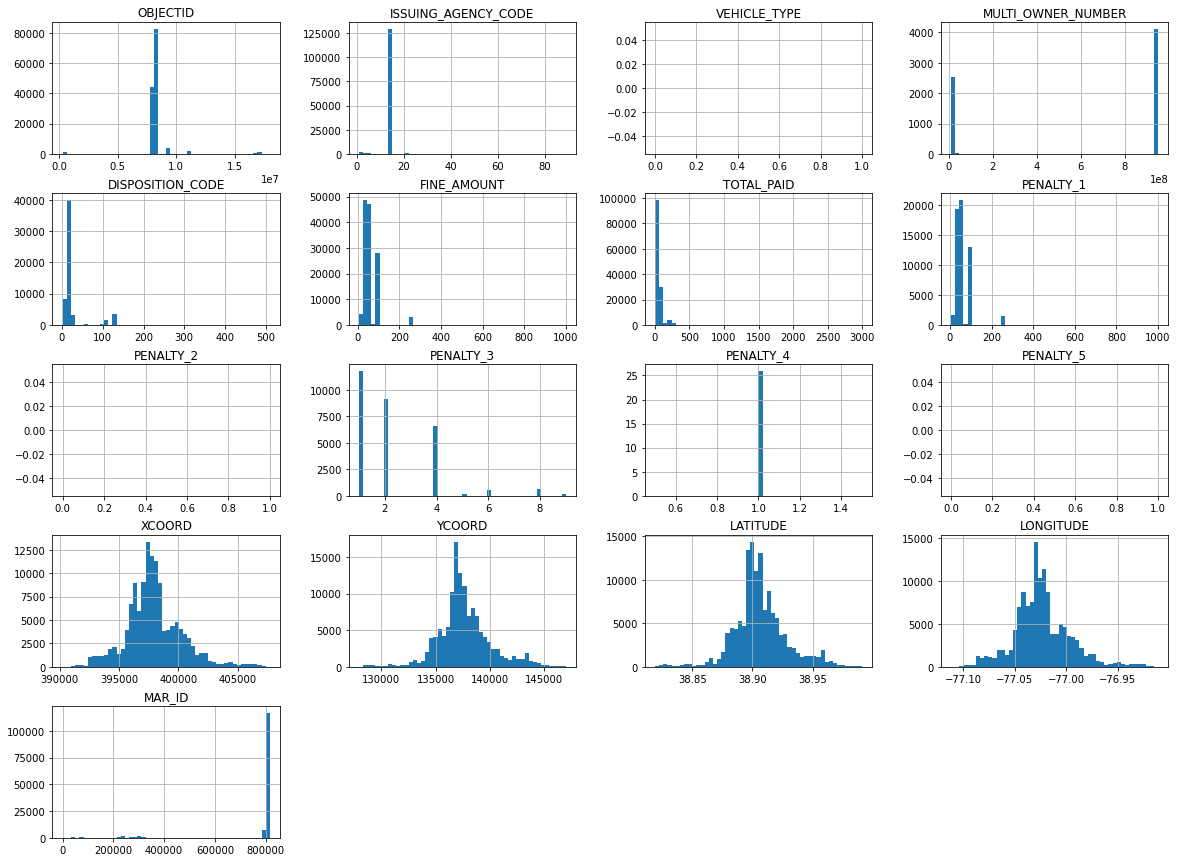

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
parking_violations.hist(bins=50, figsize=(20,15)) 
plt.show()

### Observations

Null fields:
* VEHICLE_TYPE
* PENALTY_1
* PENALTY_2
* PENALTY_3
* PENALTY_4
* PENALTY_5

Disposition fields - determine significance of DISPOSITION_CODE, DISPOSITION_TYPE, DISPOSITION_DESC, DISPOSITION_DATE
    
Date fields that require additional review:
* ISSUE_DATE - format
* GIS_LAST_MOD_DTTM - format, determine unique values and overall relevance

## Prepare Data

The vast majority of columns were dropped from the data frame.  The data set contained a number of null columns as well as some duplicated data, ie ISSUING_AGENCY_NAME and ISSUING_AGENCY_SHORT.

Date fields were transformed to objects and three fields were derived: MONTH, DAY_OF_MONTH and HOUR (24 hour format).

The target value is a custom feature, DISPOSITION_RESULT, which is a binary value determined by the presence of a disposition code.

```python
parking_violations['DISPOSITION_RESULT'] =\
        parking_violations.apply(lambda x:
                                 1 if (x['DISPOSITION_CODE'] > 0) else 0,
                                 axis=1)
```

## Modeling

This was a classification problem, so a number of classification algorithms were used:

- LogisticRegression
- PassiveAggressiveClassifier
- DecisionTreeClassifier
- RidgeClassifier
- RandomForestClassifier
- AdaBoostClassifier
- MLPClassifier

The models are assessed by their respective score function, evaluating mean and standard deviation.

## Model Selection

Cross validation scores were applied to each of the above models.

```python
log_reg_scores = cross_val_score(log_reg, X, y,
                                 scoring="neg_mean_squared_error")
log_reg_rmse_scores = np.sqrt(-log_reg_scores)
display_scores('Logistic Regression', log_reg_rmse_scores)
```

Returning the mean and standard deviation.

```shell
Logistic Regression
Mean: 0.6252493107442061
Standard deviation: 0.000978938868035884
```

Logistic Regression was the best performing model, with Ridge as the next closest.

| Model | Mean | Standard Deviation |
| --- | --- | --- |
| Logistic Regression | 0.6252493107442061 | 0.000978938868035884 |
| Passive Aggressive | 0.6534917702559954 | 0.009340231457350313 |
| Decision Tree | 0.6671820648102167 | 0.00339353095454288 |
| Ridge | 0.6251438968653231 | 0.0010335930615780144 |
| Random Forest | 0.6433891489073945 | 0.006187039807018061 |
| AdaBoost | 0.6210365172593049 | 0.0027378322442304787 |
| MLP | 0.6214307642400999 | 0.0031723727714660322 |

## Fine Tune

GridSearchCV is applied to fine tune the LogisticRegression model.  The hyper-parameters were evaluated looking at penalties and solvers.

```python
param_grid = {'C': np.logspace(-3, 3, 7),
              'penalty': ['l2', 'none'],
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
```

Best parameters {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
Best score -0.39076315813283885
Final score 0.6253313998602217

## Solution

The resulting model did not meet the ambitious target of a model score of 85%.  It made use of latitude and longitude along with date and time features.  Ultimately, the model lacked enough features to create a successful model.

## Limitations

The available datasets represent close to a decade of available data, although not every data set is usable, with many in 2019 and beyond lacking clear date and time values.  The modelling dataset could have been larger, but I chose to focus on a single year to manage performance.

I elected classify parking violations based on whether they stood versus if they were dispositioned, ie rejected.  Another dimension that could have been used was the issuing agency, which would change the study to reflect "who wrote this ticket?".

Finally, there was a financial dimension that was available for study.  This would change the perspective from a driver wondering "what is the likelihood that I will get a ticket?" to that of an issuing agency looking to maximize revenue from parking tickets.  As a citizen and a frequent recipient of parking violations I have ethical concerns about creating this kind of model.

This study is unique because it targets Washington, DC.  Other studies mentioned previously examined Vancouver and New York City.  These studies also looked at scarcity of parking and movement of people and vehicles.